In [28]:
import os
import warnings
import itertools

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [33]:
pops = ["YRI", "CEU", "CHB"]
pop_pairs = [[pop_ref, pop_query] for pop_ref in pops for pop_query in pops]

perc_mask_sites = 10
max_maf = 0.50

base_dir = "/Users/szhan/Projects/tsimpute/analysis/genealogy_only/"

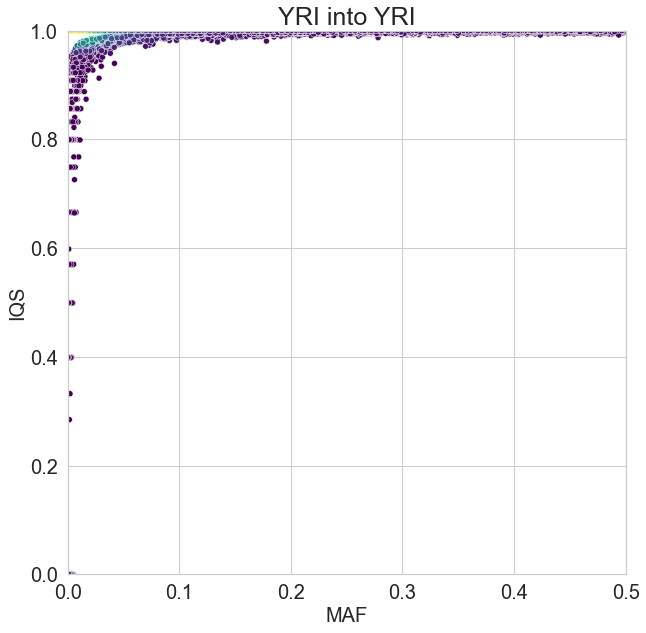

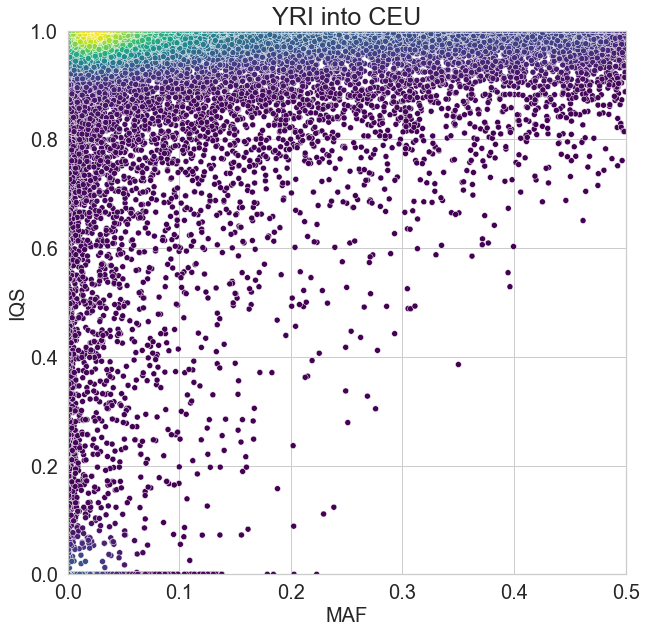

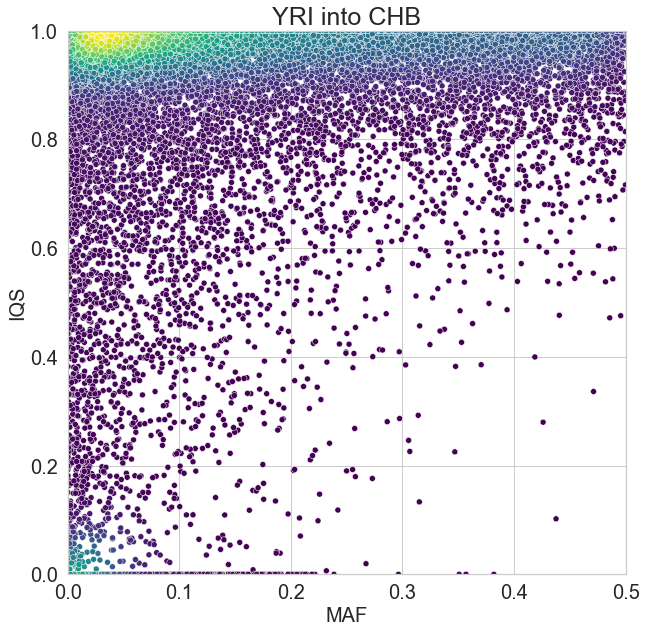

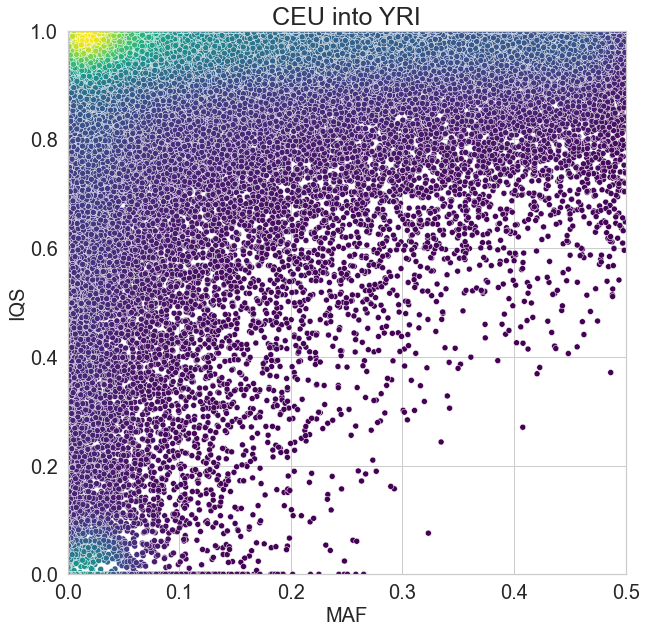

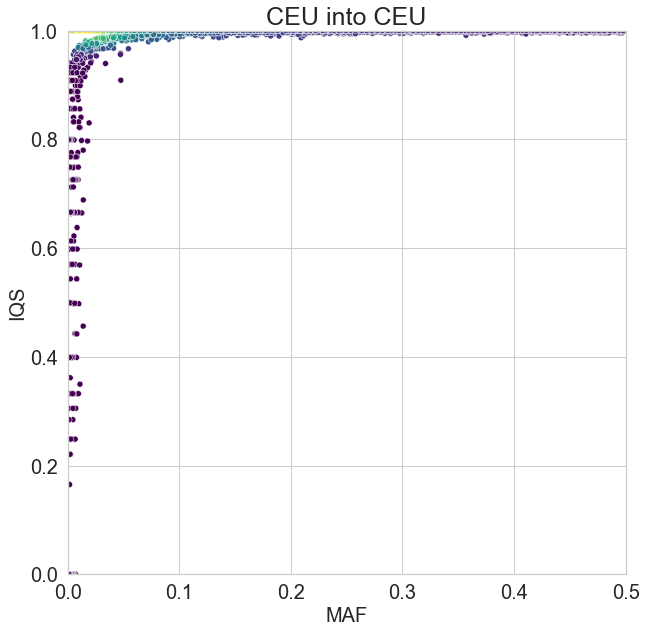

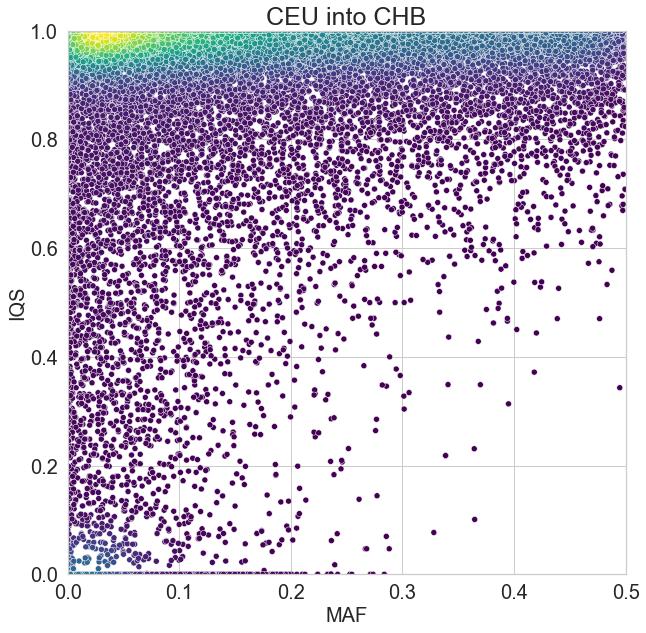

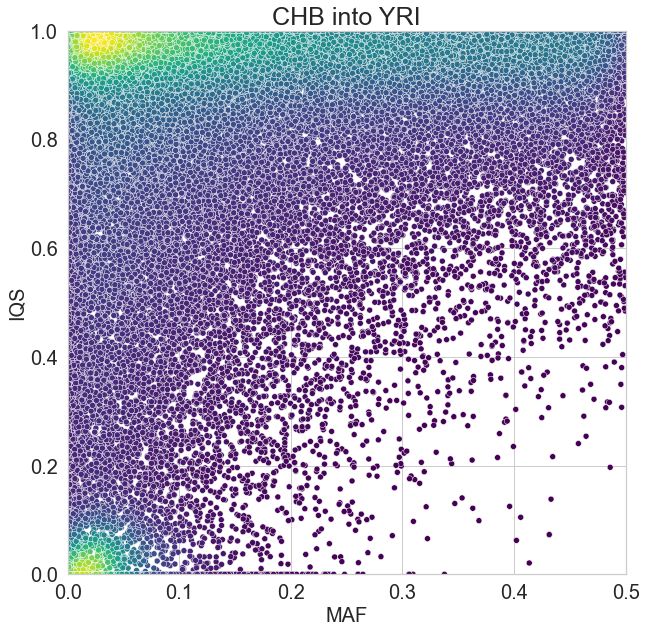

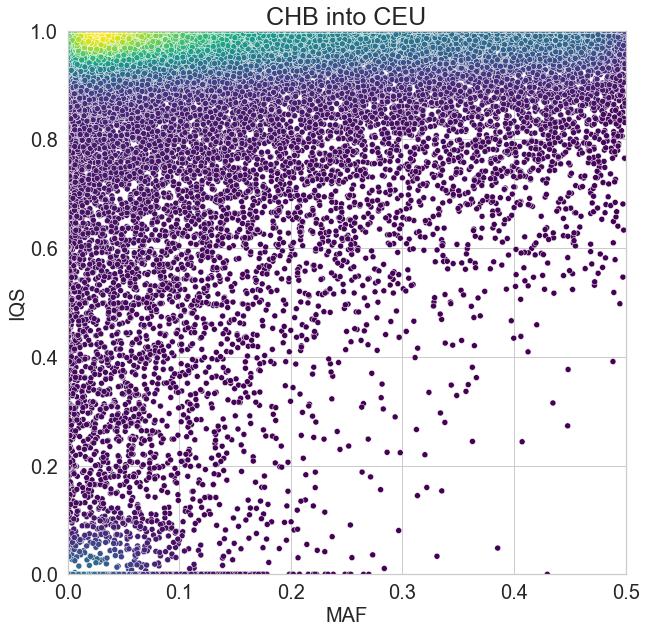

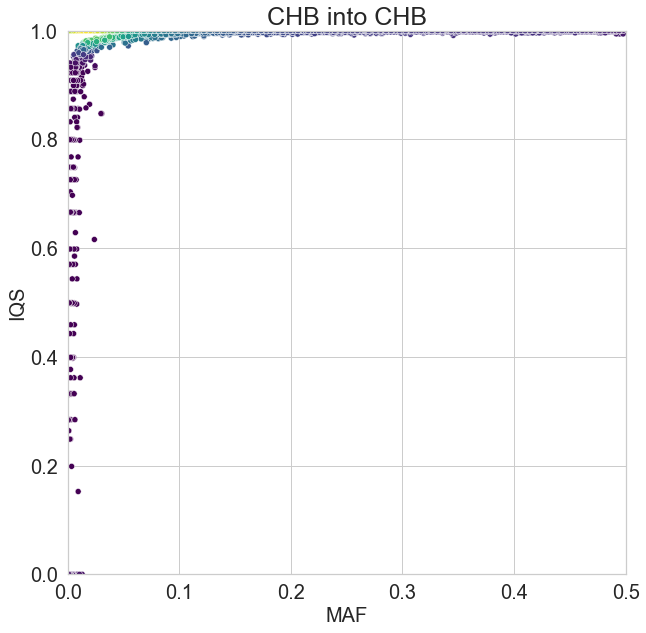

In [34]:
for pop_ref, pop_query in pop_pairs:
    in_prefix = f"ten_{pop_ref}_{pop_query}_t0_p{perc_mask_sites}"
    out_png_file = ".".join([in_prefix, "m" + str(int(max_maf * 100)), "png"])
    title_text = f"{pop_ref} into {pop_query}"

    # Collate results
    results = None
    scores = []

    num_reps = 100
    for i in np.arange(1, num_reps + 1):
        in_file = base_dir + in_prefix + "/"
        in_file += "sim_" + str(i) + ".csv"
        
        if os.path.exists(in_file):
            df = pd.read_csv(in_file, comment="#")
            df = df[["minor_allel_freq", "iqs"]].dropna(axis=0)
            scores.append(np.mean(df["iqs"]))
            results = df if results is None else pd.concat([results, df])
        else:
            warnings.warn(f"Not found {in_file}")

    # Estimate kernel to display colors
    values = np.vstack([results["minor_allel_freq"], results["iqs"]])
    kernel = stats.gaussian_kde(values)
    x = kernel(np.vstack([results["minor_allel_freq"], results["iqs"]]))

    # Plot results
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_title(title_text, size=25)
    ax.set_xlim([0, max_maf])
    ax.set_ylim([0, 1]) # TODO: Show negative values
    ax.set_ylabel("IQS", size=20)
    ax.set_xlabel("MAF", size=20)
    ax.tick_params(axis='both', which='major', labelsize=20)

    g = sns.scatterplot(
        y="iqs",
        x="minor_allel_freq",
        data=results,
        c=x,
        cmap="viridis",
        #x_jitter=True,
        ax=ax
    );

    g.get_figure().savefig(out_png_file, dpi=1000)